
#<계획표>
>
5월  9일(월) ~ 13일(금) 개인 분석 

17일(화) 조합 후 레포트 작성

5월 18일(수) ~ 19일(목) ppt 및 대본 작업

5월 20일(금) 오전까지 프로젝트 최종 점검 제출

5월 23일(월) 발표


#프로젝트 가이드라인 (변치웅 강사님의 꿀팁!)
1. 프로젝트 수행목적, 동기
2. 사용할 데이터의 변수 설명 (수집경로, 단위 포함)
3. 최소 10,000개 샘플 사용
4. 모델 선택 및 최적화과정 포함
5. 솔루션 제공 및 문제점 도출
- 상기 내용은 강제하는 내용은 아니지만 포함될 경우 좋은 프로젝트로 평가받는 요소들 입니다.
- 데이터를 다각화 하여 보는게 중요


#<프로젝트>

1. 문제정의 (선정이유)
2. 데이터 수집
3. 데이터 탐색 (이슈사항 검토 ex.생존율에는 어떤 요소가 영향을 주는지 / 분포는 어떻게 되는지)
4. 데이터 전처리
5. 모델링 (데이터 분포 분석 -> 상관관계 파악 -> 시각화)
6. 결과

>대주제 : 매출에 영향을 끼치는 요인

매출의 기준: 최종 결제까지 간 사람
(type == payment and state == completed) - (type == refund and state == completed )

각 문제별로 새 데이터프레임 만들어서 적용 


- 메인(+서브, 강의명) 카테고리
1. 10개의 카테고리 중 환불된 강의 카테고리는?
(어떤 강의들이 환불되는지?? 어떤 특징??)

- 할인금액
1. 얼마 할인해줬을 때, 가장 많은 결제를 이끌어냈는지
2. 같은 카테고리기준으로 할인 혜택을 받은 사람과 안받은 사람의 비율

- 재결제율:
1. 웰컴 할인쿠폰을 받은 사람 중 재결재한사람(신규 유입에 쿠폰의 영향?)
2. 동일한 결제 수단으로 결제 여부

- 강의 가격: 
1. 같은 카테고리 안에서 서브 카테고리별로 높은 가격 vs 낮은가격 어떤 강의 인기? 
-> .describe()사용 (실구매가, 정가 비교)



( 시간되면 )모델링에 추가
1. 어느 결제대행사로 결제하는지 + 이벤트/할인 많이 해서? 
2. 수강율이 낮은 강의 프로모션 제안 





주제 선택 (대주제 2개 이상) 
월요일까지 완료해오기 (금요일까지 권장)

기태: 강의 가격 + a

성철: 재결제율 + 강의 가격

태성: 메인 카테고리 + 할인 금액

태환

성수: 할인금액 + 재결제율

선미: 재결제율 + 카테고리


#1. 문제정의

#2. 데이터 수집


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/content/drive/MyDrive/미니프로젝트-패캠/파이널프로젝트_RAW_210329_210926.xlsx')
df = df[['customer_id', 'course_id', 'type', 'state' , 'course_title', 'category_title', 'format', 'completed_at', 'transaction_amount', 'coupon_title', 'coupon_discount_amount', 'sale_price', 'pg', 'method', 'subcategory_title', 'marketing_start_at']]
df.head()

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,NaN,VBANK,개발자 커리어,NaT
1,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,NaN,CARD,영상 편집,2020-12-02
2,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
3,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,NaN,CARD,NaN,2021-03-04
4,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


| 컬럼 | 설명 |
| ---- | ----|
| (삭제) id | << 버려도 됨..??? |
| customer_id | 중복있음!! +순수 고객수 파악하려면 전처리 필요 |
| course_id | 어떤 강의 듣는지(빈 값은 폐강으로 추측) |
| type    | 해당 강좌의 현재 결제 진행상태(order는 장바구니, payment가 최종 결제) |
| state                   | type의 진행상황 |
| course_title            | 강의 제목 |
| category_title          | 강의 카테고리 제목 |
| (삭제 보류)format         | 강의 과정 분류 종류|
| completed_at            | 강의 결제 완료 시각|
| transaction_amount      | 실 결제 금액|
| coupon_title            | 쿠폰명|
| coupon_discount_amount  | 할인된 금액|
| sale_price              | 판매 금액|
| (삭제) tax_free_amount    | 면세액 |
| pg                      | 결제대행사 (빈칸은 그 외의 결제대행사)|
| method                  | 결제 방법|
| subcategory_title       | 강의 부 카테고리 제목|
| marketing_start_at      | 해당 강의가 열린날 (일단위로 기록됨)|


____
<유의할 사항>
- 쿠폰 말고도 이벤트같은 다른 조건에 의한 할인도 있다


#3. 데이터 탐색

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   customer_id             105416 non-null  float64       
 1   course_id               100212 non-null  float64       
 2   type                    105419 non-null  object        
 3   state                   105419 non-null  object        
 4   course_title            105403 non-null  object        
 5   category_title          105395 non-null  object        
 6   format                  105403 non-null  object        
 7   completed_at            105419 non-null  datetime64[ns]
 8   transaction_amount      105419 non-null  int64         
 9   coupon_title            31817 non-null   object        
 10  coupon_discount_amount  31817 non-null   float64       
 11  sale_price              104291 non-null  float64       
 12  pg                      90344 

# 분석 주제 토의

최적의 가성비 할인율은 얼마?

판매 금액의 얼마정도를 할인했을 때 결제율이 상승하는지

sale_price , transaction_amount를 통해 할인율을 10% 단위로 분류

할인율에 따라 결제 수를 비교

+카테고리별, 




해비유저 vs 라이트 유저 둘 중 누가 더 매출 많이 올려주는지

두 그룹의 결제 빈도

---


카테고리 별 관심도 >> 할인 여부 

마케팅 시작일과 수강시작일의 관계

웰컴쿠폰 사용자가 재결제하는지

---

마케팅을 시작하고 수강 완료 시간 사이에 코스

코스를 카테고리별로 분류해서 요금의 평균을 어느 강의가 가격대 분석 >> 가격대에 비교했을때 결제율이 차이나는지

--


서브 카테고리를 통해 강의 주제를 분류하고 같은 종류의 강의에서 쿠폰의 여부 결제 판단에 영향을 미치는지


--


결제 금액과 카테고리의 상관관계 + 있다면 쿠폰이 영향을 주는지 + 결제대행사가 결제(할인을 준다던가) 영향을 주는지 

마케팅 시작일 할때 강의수강률이 올라가는지?


#4. 데이터 전처리

>결측치 제거

In [5]:
#결측치 제거
df = df.dropna(subset=['category_title'])
df.isna().sum()

customer_id                   0
course_id                  5183
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title              73578
coupon_discount_amount    73578
sale_price                 1112
pg                        15058
method                    13095
subcategory_title         19805
marketing_start_at        17955
dtype: int64

>결제 완료한 사람 중 환불하지 않은 사람만 판별 

In [6]:
# 불필요한 카테고리 삭제
df = df[df.category_title != '크리에이티브']
df = df[df.category_title != '교육']
df = df[df.category_title != '지식콘텐츠']
df = df[df.category_title != '비즈니스']
df = df[df.category_title != '파이낸스']
df = df[df.category_title != '관리']

df['category_title'].value_counts()

프로그래밍       34430
데이터사이언스     14076
업무 생산성      13323
디자인         12009
영상/3D       10260
마케팅          9857
부동산/금융       5523
투자/재테크       2501
데이터 사이언스        9
일러스트            1
Name: category_title, dtype: int64

In [7]:
# 1. 띄어쓰기 차이로 다른 강의로 구분된 '데이터사이언스'와 '데이터 사이언스'를 합쳐준다.
# 2. 디자인 카테고리에 서브 카테고리로 속해있는 '일러스트' 카테고리를 '디자인'카테고리에 편입시켜준다.
# 3. '교육','지식콘텐츠','비즈니스','파이낸스','관리' 카테고리는 현재 폐강된 카테고리들로 삭제해준다.
df['category_title'].value_counts().to_frame()

# 카테고리 변경
df = df.replace({'category_title':{'데이터 사이언스':'데이터사이언스'}})
df = df.replace({'category_title':{'일러스트':'디자인'}})
df['category_title'].value_counts().to_frame()

,category_title
프로그래밍,34430
데이터사이언스,14085
업무 생산성,13323
디자인,12010
영상/3D,10260
마케팅,9857
부동산/금융,5523
투자/재테크,2501


In [8]:
# 결제가 완료된 사람의 데이터
df_pc = df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]
df_pc.head()

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
2,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
4,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
10,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,CARD,NaN,2020-11-27
14,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02


In [9]:
# 환불이 완료된 사람의 데이터
df_rc =df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]
df_rc.head()

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
651,444760.0,204122.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,NaN,NaN,404000.0,NaN,VBANK,NaN,NaT
652,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,NaN,NaN,116000.0,NaN,CARD,영상 편집,2020-12-02
666,447177.0,203989.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,NaN,NaN,89000.0,NaN,CARD,일러스트,2021-02-19
672,373915.0,204264.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,NaN,NaN,340000.0,NaN,VBANK,NaN,2021-03-08
675,456086.0,NaN,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT


In [10]:
# 결제가 완료된 사람과 환불이 완료된 사람의 데이터를 합쳐준다.
df_total = pd.merge(df_pc,df_rc,how='outer')
df_total

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
1,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
2,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
3,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,CARD,NaN,2020-11-27
4,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54762,600073.0,206065.0,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,NaN,NaN,179000.0,NAVER,CARD,백엔드 개발,2021-07-15
54763,645911.0,NaN,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,NaN,NaN,1400000.0,INICIS,CARD,NaN,NaT
54764,506356.0,206720.0,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,NaN,NaN,259000.0,NAVER,CARD,영상 편집,2021-08-17
54765,604077.0,205569.0,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,NaN,NaN,129000.0,KAKAO,POINT,엑셀/VBA,2021-08-17


In [11]:
# 합친 데이터 중에서 중복된 customer_id를 제거해준다.
df_total = df_total.drop_duplicates(['customer_id' , 'course_title','coupon_title'],keep = 'last')
df_total['type'].value_counts()

PAYMENT    49625
REFUND      3645
Name: type, dtype: int64

In [12]:
# 남아있는 REFUND는 제공된 데이터 기간 전에 결제를 완료하고, 제공된 기간 내에 환불이 완료된 데이터이다.
# 정해진 기간내의 환불 비율을 알고싶으므로 PAYMENT만 골라낸다.
df_pay = df_total['type'] == 'PAYMENT'
df_pay = df_total[df_pay]
df_pay

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
1,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
2,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
3,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,CARD,NaN,2020-11-27
4,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51064,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
51065,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,KAKAO,CARD,영상 편집,2020-12-02
51066,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
51067,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


# 카테고리 분류

In [13]:
# 카테고리->서브카테고리 개수
df_pay.groupby('category_title')["subcategory_title"].value_counts().to_frame()

subcategory_title
category_title subcategory_title                   
데이터사이언스        딥러닝/인공지능                        2258
               데이터분석                           2055
               머신러닝                            1030
               데이터엔지니어링                         172
디자인            디자인툴                            1866
               일러스트                            1505
               UX/UI                           1285
               시각디자인                            933
마케팅            글쓰기/카피라이팅                       1643
               데이터마케팅                          1066
               디지털마케팅                           832
               SNS마케팅                           641
부동산/금융         금융/투자 실무                        1115
               회계/재무/세무                         981
               부동산 개발                           577
업무 생산성         PPT/보고서                         2023
               엑셀/VBA                          1950
               업무자동화                            482
               리더십                              276
               커뮤니케이션                           114
영상/3D          영상 편집                           3546
               모션그래픽                            934
               VFX                              342
               게임 그래픽                           213
투자/재테크         주식 투자                           1072
               부동산 투자                           375
프로그래밍          백엔드 개발                          3293
               개발자 커리어                         3043
               프론트엔드 개발                        2662
               모바일앱                            1737
               DevOps                          1175
               게임                               839
               코딩 입문                            409

           category_title
course_id  프로그래밍             16588
           업무 생산성             6349
           데이터사이언스            6160
           디자인                5589
           영상/3D              5032
           마케팅                4389
           부동산/금융             2718
           투자/재테크             1447
dtype: int64


Text(0, 0.5, 'counts')

<Figure size 720x432 with 0 Axes>

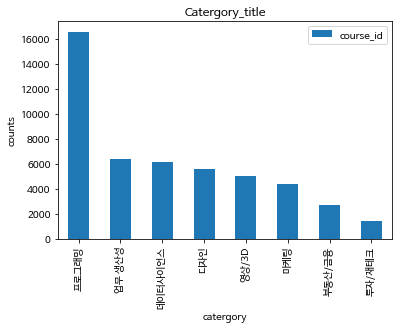

In [16]:
# 카테고리별 강의수
df_category = df_pay.groupby('category_title')['course_id'].count().sort_values(ascending = False).to_frame()
print(df_category.unstack())

plt.figure(figsize=(10,6))
df_category.plot(kind='bar')
plt.title("Catergory_title")
plt.xlabel("catergory")
plt.ylabel("counts")

In [15]:
plt.rc('font', family='NanumBarunGothic') 

In [20]:
# 한글

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt



Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,758 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 가정) 강의가격이 매출의 영향을 줄수 있을까?
 
1. 같은 타이틀을 갖고 가격이 다른 강의들을 비교해 본다. 
  * 판매날짜는 같고 가격만 다른 강의들을 주어진 데이터로 가격차이의 근거를 찾기 힘들다.
  * 완료 날짜만으로 가격에 따라 강의를 선택했다는 근거를 찾을수 없다. 
 
 
2. 같은 서브 카테고리내에서 강의 타이틀은 다르지만 비슷한 강의들의 가격비교를 통해 비교해 본다.
   * 강의의 수요는 자신이 필요한 강의를 찾아구매하기 때문에
     강의가격과 강의내용(강의명)의 상관관계를 찾기 힘들다.
   *  강의명만으로 같은 내용의 강의로 판단 할 수 없다.

3. 쿠폰사용 여부로 달라지는 강의가격으로 비교해 본다.
  * 쿠폰의 종류를 찾아본다.
  * 쿠폰의 사용여부를 0과1로 나타내어 사용비율을 찾아본다.
  
4. 결제평균(transaction)과 강의가격평균(sale_price)를 비교해본다. 


## 카테코리

### 1.프로그래밍

           subcategory_title
course_id  백엔드 개발               3293
           개발자 커리어              3043
           프론트엔드 개발             2662
           모바일앱                 1737
           DevOps               1175
           게임                    839
           코딩 입문                 409
dtype: int64


Text(0, 0.5, 'counts')

<Figure size 720x432 with 0 Axes>

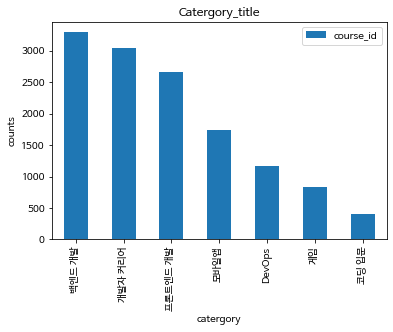

In [17]:
#1 프로그래밍 카테고리
df_prog = df_pay[df_pay['category_title'] == '프로그래밍']
df_prog_subcategory = df_prog.groupby('subcategory_title')['course_id'].count().sort_values(ascending = False).to_frame()
print(df_prog_subcategory.unstack())

plt.figure(figsize=(10,6))
df_prog_subcategory.plot(kind='bar')
plt.title("Catergory_title")
plt.xlabel("catergory")
plt.ylabel("counts")

In [18]:
#2 카테고리가 프로그래밍인 강의중에서 course_title이 같으면 같은강의라 생각하고 중복을 제거 -> 203개
df_id = df_prog[['course_title','course_id','sale_price','subcategory_title','coupon_title']]
df_dup = df_id.drop_duplicates(['course_title'])
df_dup.sort_values('course_id', ascending = False)


,course_title,course_id,sale_price,subcategory_title,coupon_title
50708,(B2B) K-Digital Credit Python&Django로 시작하는 웹 프...,207655.0,45000.0,NaN,NaN
49828,(B2B) K-Digital Credit Java & SpringBoot로 시작하는...,207654.0,40000.0,NaN,NaN
50383,(B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_6기,207652.0,30000.0,NaN,NaN
50720,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_6기,207651.0,30000.0,NaN,NaN
50221,(B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_6기,207648.0,20000.0,NaN,NaN
...,...,...,...,...,...
50220,프로모션 : iOS 개발 맥북 pro 패스(9월 현물 프리패스),NaN,1800000.0,NaN,NaN
50251,프로모션 : 풀스택 개발자 맥북 air 패스(9월 현물 프리패스),NaN,1400000.0,NaN,NaN
50283,프로모션 : 프론트엔드 맥북 pro 패스 (9월 현물 프리패스),NaN,1800000.0,NaN,NaN
50333,프로모션 : 프론트엔드 맥북 air 패스 (9월 현물 프리패스),NaN,1400000.0,NaN,NaN


In [52]:
#3 같은강의명의 다른 가격
A = df_prog.groupby('course_title')['sale_price']
A.apply(set).to_frame()


,sale_price
course_title,
(B2B) (주)마음의선물 온라인 구독 패키지 플랜 - 비대면바우처,{nan}
(B2B) (주)아르케 온라인 구독 패키지 플랜 - 비대면바우처,{nan}
(B2B) (주)유투바이오 온라인 구독 패키지 플랜 - 비대면바우처,{nan}
(B2B) (주)이멕스테크 온라인 구독 패키지 플랜 - 비대면바우처,{nan}
(B2B) (주)이타넷 온라인 구독 패키지 플랜 - 비대면바우처,{nan}
...,...
프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),{299000.0}
프론트엔드 개발자 되기 온라인 완주반 3기,"{600000.0, 620000.0, 610000.0}"
프론트엔드 개발자 되기 온라인 완주반 4기,"{580000.0, 620000.0, 600000.0, 610000.0, 59000..."


###2.데이터사이언스

In [ ]:
#1 데이터사이언스 카테고리
df_data = df_pay[df_pay['category_title'] == '데이터사이언스']
df_data_subcategory = df_data.groupby('subcategory_title')['course_id'].count().sort_values(ascending = False).to_frame()
print(df_data_subcategory.unstack())

plt.figure(figsize=(10,6))
df_data_subcategory.plot(kind='bar')
plt.title("Catergory_title")
plt.xlabel("catergory")
plt.ylabel("counts")

In [ ]:
#2 카테고리가 데이터사이언스인 강의중에서 course_title이 같으면 같은강의라 생각하고 중복을 제거
df_id2 = df_data[['course_title','course_id','sale_price','subcategory_title','coupon_title']]
df_dup2 = df_data.drop_duplicates(['course_title'])
df_dup2.sort_values('course_id', ascending = False)


In [ ]:
#3 같은강의명의 다른 가격
A2 = df_data.groupby('course_title')['sale_price']
A2.apply(set).to_frame()

###3.업무 생산성

In [ ]:
#1 업무 생산성 카테고리
df_task = df_pay[df_pay['category_title'] == '업무 생산성']
df_task_subcategory = df_task.groupby('subcategory_title')['course_id'].count().sort_values(ascending = False).to_frame()
print(df_task_subcategory.unstack())

plt.figure(figsize=(10,6))
df_task_subcategory.plot(kind='bar')
plt.title("Catergory_title")
plt.xlabel("catergory")
plt.ylabel("counts")

In [ ]:
#2 카테고리가 업무 생산성인 강의중에서 course_title이 같으면 같은강의라 생각하고 중복을 제거
df_id3 = df_task[['course_title','course_id','sale_price','subcategory_title','coupon_title']]
df_dup3 = df_task.drop_duplicates(['course_title'])
df_dup3.sort_values('course_id', ascending = False)

In [ ]:
#3 같은강의명의 다른 가격
A3 = df_task.groupby('course_title')['sale_price']
A3.apply(set).to_frame()

###4.디자인

In [ ]:
#1 디자인 카테고리
df_dsg = df_pay[df_pay['category_title'] == '디자인']
df_dsg_subcategory = df_dsg.groupby('subcategory_title')['course_id'].count().sort_values(ascending = False).to_frame()
print(df_dsg_subcategory.unstack())

plt.figure(figsize=(10,6))
df_dsg_subcategory.plot(kind='bar')
plt.title("Catergory_title")
plt.xlabel("catergory")
plt.ylabel("counts")

In [ ]:
#2 카테고리가 디자인 인 강의중에서 course_title이 같으면 같은강의라 생각하고 중복을 제거
df_id4 = df_dsg[['course_title','course_id','sale_price','subcategory_title','coupon_title']]
df_dup4 = df_dsg.drop_duplicates(['course_title'])
df_dup4.sort_values('course_id', ascending = False)

In [ ]:
#3 같은강의명의 다른 가격
A4 = df_dsg.groupby('course_title')['sale_price']
A4.apply(set).to_frame()

###5.영상/3D

In [ ]:
#1 영상/3D 카테고리
df_scr = df_pay[df_pay['category_title'] == '영상/3D']
df_scr_subcategory = df_scr.groupby('subcategory_title')['course_id'].count().sort_values(ascending = False).to_frame()
print(df_scr_subcategory.unstack())

plt.figure(figsize=(10,6))
df_scr_subcategory.plot(kind='bar')
plt.title("Catergory_title")
plt.xlabel("catergory")
plt.ylabel("counts")

In [ ]:
#2 카테고리가 영상/3D 인 강의중에서 course_title이 같으면 같은강의라 생각하고 중복을 제거
df_id5 = df_scr[['course_title','course_id','sale_price','subcategory_title','coupon_title']]
df_dup5 = df_scr.drop_duplicates(['course_title'])
df_dup5.sort_values('course_id', ascending = False)

In [ ]:
#3 같은강의명의 다른 가격
A5 = df_scr.groupby('course_title')['sale_price']
A5.apply(list).to_frame()

###6.마케팅

In [ ]:
#1 마케팅 카테고리
df_mk = df_pay[df_pay['category_title'] == '마케팅']
df_mk_subcategory = df_mk.groupby('subcategory_title')['course_id'].count().sort_values(ascending = False).to_frame()
print(df_mk_subcategory.unstack())

plt.figure(figsize=(10,6))
df_mk_subcategory.plot(kind='bar')
plt.title("Catergory_title")
plt.xlabel("catergory")
plt.ylabel("counts")

In [ ]:
#2 카테고리가 마케팅 인 강의중에서 course_title이 같으면 같은강의라 생각하고 중복을 제거
df_id6 = df_mk[['course_title','course_id','sale_price','subcategory_title','coupon_title']]
df_dup6 = df_mk.drop_duplicates(['course_title'])
df_dup6.sort_values('course_id', ascending = False)

In [ ]:
#3 같은강의명의 다른 가격
A6 = df_mk.groupby('course_title')['sale_price']
A6.apply(set).to_frame()

###7.부동산/금융

In [ ]:
#1 부동산/금융 카테고리
df_est = df_pay[df_pay['category_title'] == '부동산/금융']
df_est_subcategory = df_est.groupby('subcategory_title')['course_id'].count().sort_values(ascending = False).to_frame()
print(df_est_subcategory.unstack())

plt.figure(figsize=(10,6))
df_est_subcategory.plot(kind='bar')
plt.title("Catergory_title")
plt.xlabel("catergory")
plt.ylabel("counts")

In [ ]:
#2 카테고리가 부동산/금융 인 강의중에서 course_title이 같으면 같은강의라 생각하고 중복을 제거
df_id7 = df_est[['course_title','course_id','sale_price','subcategory_title','coupon_title']]
df_dup7 = df_est.drop_duplicates(['course_title'])
df_dup7.sort_values('course_id', ascending = False)

In [ ]:
#3 같은강의명의 다른 가격
A7 = df_est.groupby('course_title')['sale_price']
A7.apply(set).to_frame()

###8.투자/재테크

           subcategory_title
course_id  주식 투자                1072
           부동산 투자                375
dtype: int64


Text(0, 0.5, 'counts')

<Figure size 720x432 with 0 Axes>

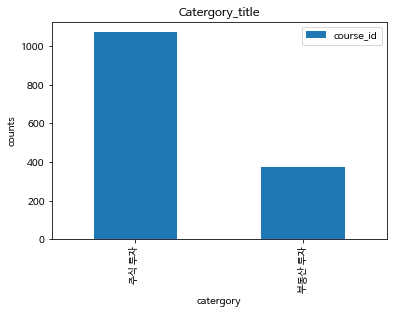

In [62]:
#1 투자/재테크 카테고리
df_inv = df_pay[df_pay['category_title'] == '투자/재테크']
df_inv_subcategory = df_inv.groupby('subcategory_title')['course_id'].count().sort_values(ascending = False).to_frame()
print(df_inv_subcategory.unstack())

plt.figure(figsize=(10,6))
df_inv_subcategory.plot(kind='bar')
plt.title("Catergory_title")
plt.xlabel("catergory")
plt.ylabel("counts")

In [63]:
#2 카테고리가 투자/재테크 인 강의중에서 course_title이 같으면 같은강의라 생각하고 중복을 제거
df_id8 = df_inv[['course_title','course_id','sale_price','subcategory_title','coupon_title']]
df_dup8 = df_inv.drop_duplicates(['course_title'])
df_dup8.sort_values('course_id', ascending = False)

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
42429,13443.0,206224.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 부동산 경매/공매,투자/재테크,올인원,2021-08-23 16:13:40,129000,[한 번에 끝내는 부동산 경매/공매] 강의 5만 원 할인 쿠폰,50000.0,179000.0,KAKAO,CARD,부동산 투자,2021-08-23
25233,569240.0,205707.0,PAYMENT,COMPLETED,올인원 패키지 : 15명의 전문 애널리스트에게 배우는 산업&매크로 분석과 투자 전략,투자/재테크,올인원,2021-06-23 06:14:30,299000,NaN,NaN,299000.0,KAKAO,POINT,주식 투자,2021-06-23
30720,84526.0,205579.0,PAYMENT,COMPLETED,올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,투자/재테크,올인원,2021-07-13 13:37:24,319000,NaN,NaN,319000.0,KAKAO,POINT,주식 투자,2021-07-13
34223,593729.0,205578.0,PAYMENT,COMPLETED,올인원 패키지 : 박민수에게 배우는 직장인 초현실 투자 전략,투자/재테크,올인원,2021-07-26 11:25:51,0,[무료수강권] 내부직원용_AOP_김인지 PD님,219000.0,219000.0,NaN,PROMOTION,주식 투자,2021-07-26
6679,20884.0,204633.0,PAYMENT,COMPLETED,올인원 패키지 : 아파트 말고 부동산 재테크 시작하기,투자/재테크,올인원,2021-04-21 11:25:06,215000,NaN,NaN,215000.0,INICIS,CARD,부동산 투자,2021-04-20
361,461610.0,202789.0,PAYMENT,COMPLETED,올인원 패키지 : 2021 취업/이직/투자를 위한 기업분석,투자/재테크,올인원,2021-03-29 11:05:09,0,수강생 50만명 돌파 기념 감사제 쿠폰,125000.0,102500.0,NaN,PROMOTION,주식 투자,2020-09-11
969,480414.0,202382.0,PAYMENT,COMPLETED,올인원 패키지 : R을 활용한 퀀트 전략 구현,투자/재테크,올인원,2021-03-30 12:45:43,115500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,135500.0,NaN,VBANK,주식 투자,2020-03-11
153,478363.0,201313.0,PAYMENT,COMPLETED,올인원 패키지 : 부동산 투자,투자/재테크,올인원,2021-03-28 23:07:42,105000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,115000.0,NaN,CARD,부동산 투자,NaT


In [64]:
#3 같은강의명의 다른 가격
A8 = df_inv.groupby('course_title')['sale_price']
A8.apply(set).to_frame()

,sale_price
course_title,
올인원 패키지 : 15명의 전문 애널리스트에게 배우는 산업&매크로 분석과 투자 전략,"{299000.0, 319000.0, 329000.0, 339000.0}"
올인원 패키지 : 2021 취업/이직/투자를 위한 기업분석,"{104000.0, 102500.0, 145000.0, 103500.0, 10450..."
올인원 패키지 : R을 활용한 퀀트 전략 구현,"{138500.0, 158500.0, 178500.0, 135500.0, 13650..."
올인원 패키지 : 박민수에게 배우는 직장인 초현실 투자 전략,"{219000.0, 239000.0, 249000.0}"
올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,"{319000.0, 321000.0, 329000.0}"
올인원 패키지 : 부동산 투자,"{116000.0, 117000.0, 147000.0, 115500.0, 11650..."
올인원 패키지 : 아파트 말고 부동산 재테크 시작하기,"{224000.0, 232000.0, 220000.0, 228000.0, 21500..."
초격차 패키지 : 한 번에 끝내는 부동산 경매/공매,"{179000.0, 189000.0}"
